In [3]:
# import CHANNELS
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.python.saved_model.tag_constants import TRAINING

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/Users/sheetals/code/projects/DeepLearning/potato-leaf-disease-detection/PlantVillage",
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE)
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [8]:
68 * BATCH_SIZE

2176

In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[167. 171. 182.]
  [198. 202. 213.]
  [175. 179. 190.]
  ...
  [158. 160. 172.]
  [183. 185. 197.]
  [171. 173. 185.]]

 [[157. 161. 172.]
  [179. 183. 194.]
  [155. 159. 170.]
  ...
  [180. 182. 194.]
  [183. 185. 197.]
  [171. 173. 185.]]

 [[161. 165. 176.]
  [168. 172. 183.]
  [149. 153. 164.]
  ...
  [192. 194. 206.]
  [178. 180. 192.]
  [178. 180. 192.]]

 ...

 [[118. 115. 126.]
  [122. 119. 130.]
  [123. 120. 131.]
  ...
  [123. 127. 139.]
  [132. 136. 148.]
  [137. 141. 153.]]

 [[117. 114. 125.]
  [117. 114. 125.]
  [116. 113. 124.]
  ...
  [138. 142. 154.]
  [134. 138. 150.]
  [124. 128. 140.]]

 [[139. 136. 147.]
  [133. 130. 141.]
  [126. 123. 134.]
  ...
  [140. 144. 156.]
  [131. 135. 147.]
  [113. 117. 129.]]], shape=(256, 256, 3), dtype=float32)


2025-10-09 10:45:21.507575: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


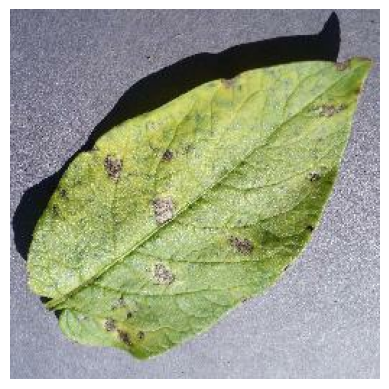

In [14]:
 for image_batch, label_batch in dataset.take(1):
     plt.imshow(image_batch[0].numpy().astype('uint8'))
     plt.axis('off')
     plt.show()

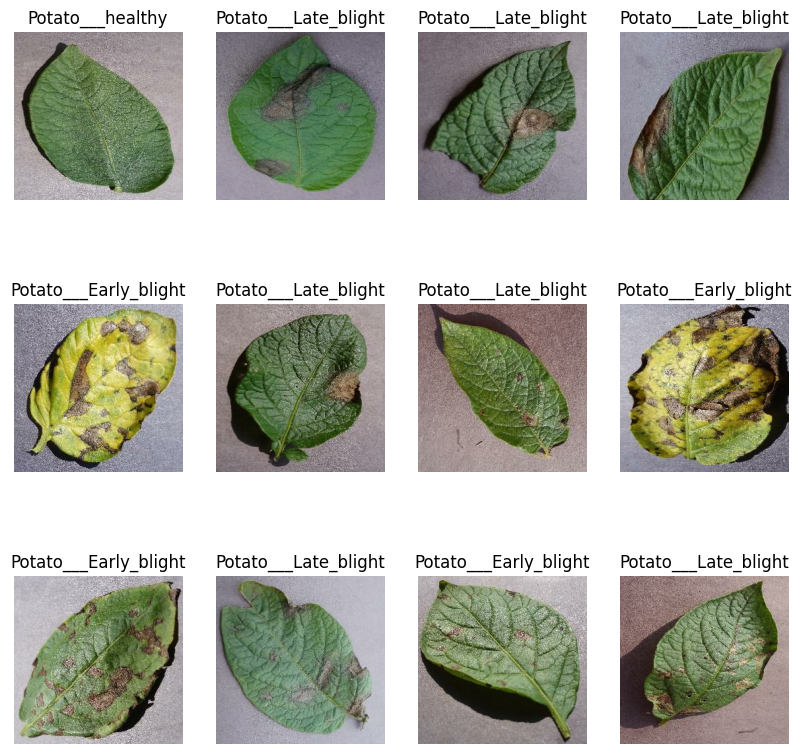

In [19]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        plt.subplot(3,4,i+1)
        plt. imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

 80% ==> TRAINING

 20% ==> 10% -> validation, 10% -> Testing

In [20]:
training_size = 0.8
len(dataset) * training_size

54.400000000000006

In [21]:
train_ds = dataset.take(54)
len(train_ds)

54

In [22]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [24]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [25]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [26]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [34]:
def get_dataset_partitions(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000  ):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [36]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [38]:
len(train_ds), len(test_ds), len(val_ds)

(54, 8, 6)

In [39]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### rescaling the resizing the provided in the later time if they are not in provided in the expected format

In [45]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),
])

In [46]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [94]:
input_size = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, 3)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_size),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size =(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_size)

In [95]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [97]:
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 413ms/step - accuracy: 0.5642 - loss: 0.8187 - val_accuracy: 0.6979 - val_loss: 0.6446
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 424ms/step - accuracy: 0.8189 - loss: 0.4232 - val_accuracy: 0.8750 - val_loss: 0.2539
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 449ms/step - accuracy: 0.8964 - loss: 0.2502 - val_accuracy: 0.9062 - val_loss: 0.2162
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 429ms/step - accuracy: 0.9265 - loss: 0.2065 - val_accuracy: 0.9479 - val_loss: 0.1335
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 431ms/step - accuracy: 0.9329 - loss: 0.1663 - val_accuracy: 0.9323 - val_loss: 0.1407
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 432ms/step - accuracy: 0.9404 - loss: 0.1605 - val_accuracy: 0.9531 - val_loss: 0.1347
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 466ms/step - accuracy: 0.9520 - loss: 0.1294 - val_accuracy: 0.9271 - val_loss: 0.1874
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 459ms/step - accuracy: 0.9578 - loss: 0.1152 - val_accu

In [98]:
score  = model.evaluate(test_ds)
score

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.9648 - loss: 0.1086


[0.10855389386415482, 0.96484375]

In [99]:
history

In [100]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [101]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [102]:
history.history['accuracy'][-1],history.history['loss'][-1]

(0.9814814925193787, 0.0681631863117218)

In [103]:
history.history['val_accuracy'][-1],history.history['val_loss'][-1]

(0.9791666865348816, 0.055963438004255295)

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

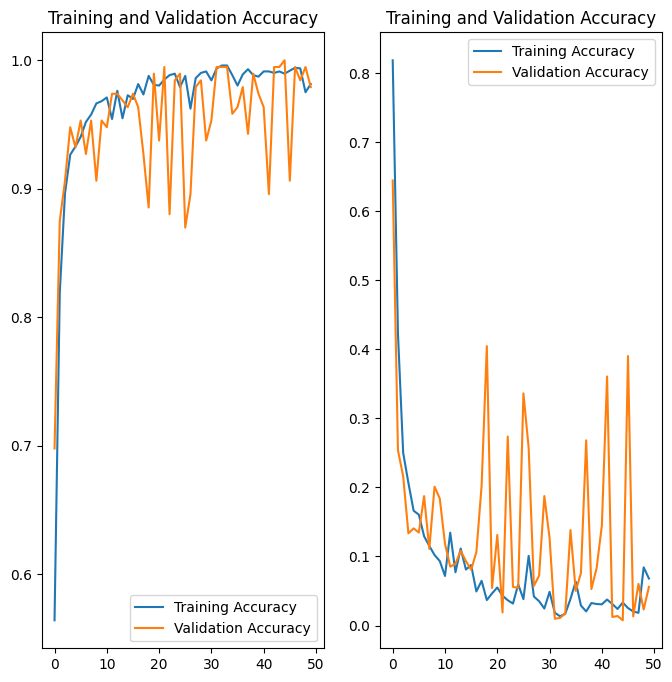

In [107]:
plt.figure(figsize=(8, 8))
plt. subplot (1, 2, 1)
plt. plot(range(50), acc, label='Training Accuracy')
plt. plot(range(50), val_acc, label='Validation Accuracy')
plt. legend (loc='lower right')
plt.title('Training and Validation Accuracy')

plt. subplot (1, 2, 2)
plt. plot(range(50), loss, label='Training Accuracy')
plt. plot(range(50), val_loss, label='Validation Accuracy')
plt. legend (loc='upper right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
[1.0000000e+00 4.2265875e-11 5.8987163e-37]
Predicted class :  Potato___Early_blight


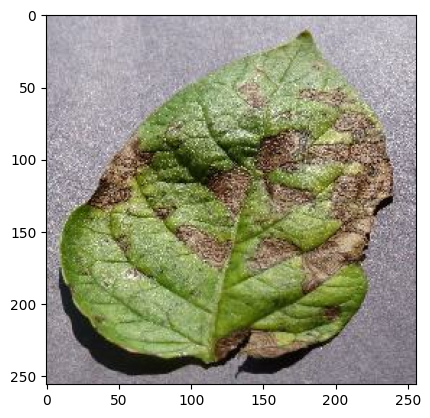

In [117]:

import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow (first_image)
    print("actual label:", class_names[first_label])

    batch_prediciton = model.predict(image_batch)
    print(batch_prediciton[0])
    print("Predicted class : ",class_names[np.argmax(batch_prediciton[0])])

In [122]:
from django.core.files import images

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


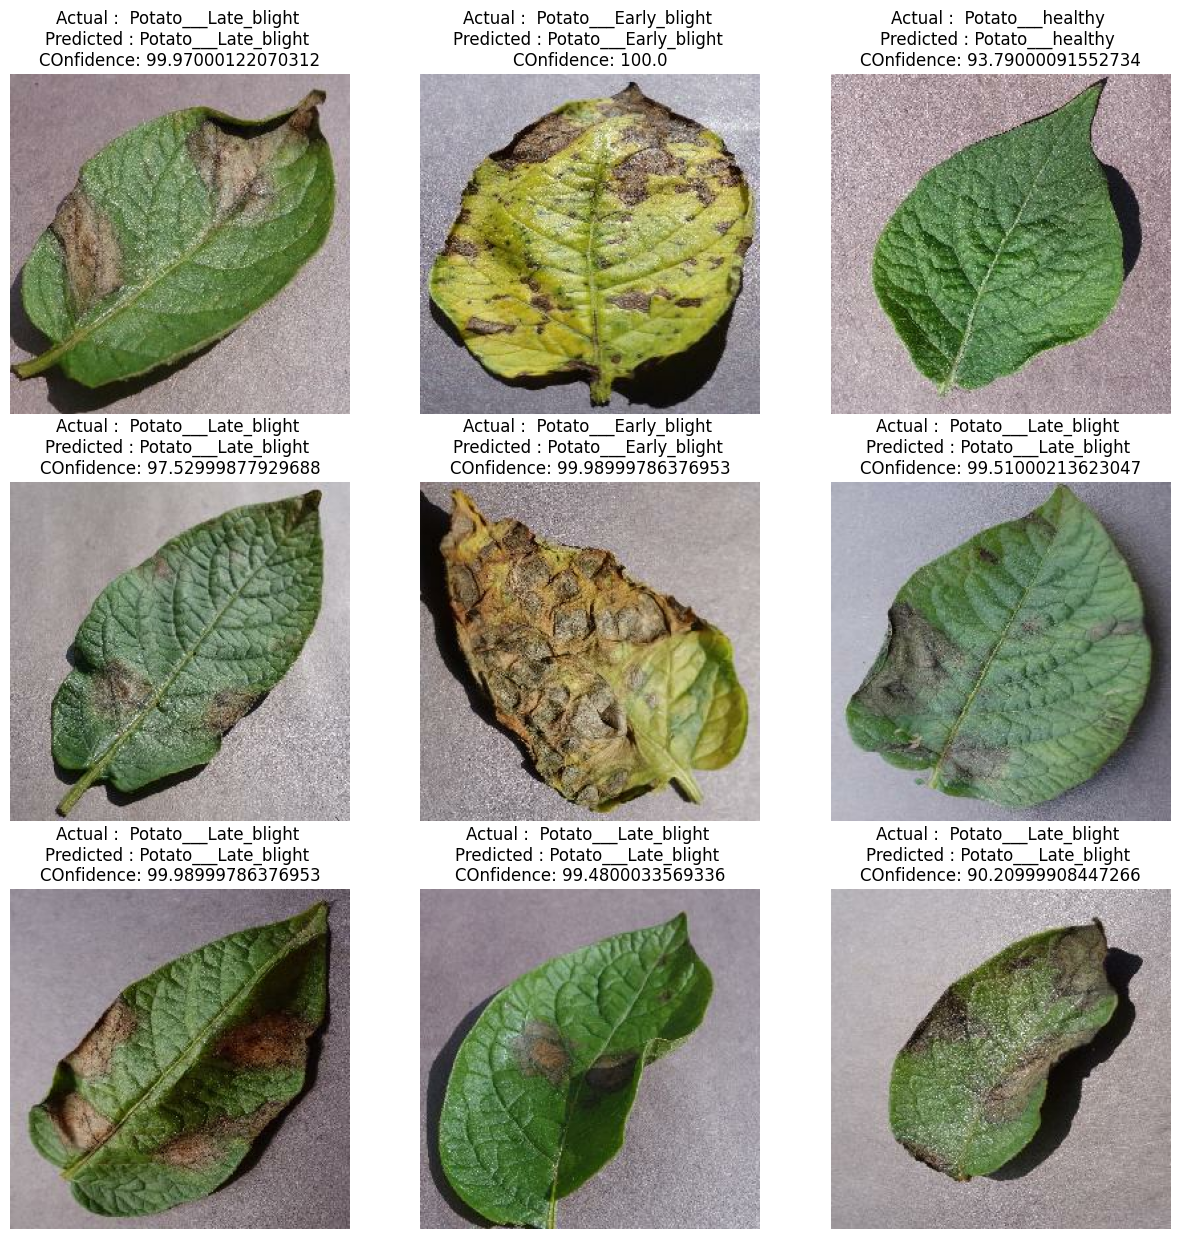

In [127]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]

        plt.title(f"Actual :  {actual_class} \nPredicted : {predicted_class} \nCOnfidence: {confidence}")
        plt.axis("off")


In [137]:
model_version = 1
model.save(f"../saved_models/{model_version}.h5")

In [136]:
# import os
# model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
# model.save(f"../models/{model_version}.h5")

In [9]:
import tensorflow as tf
import shutil
import os

print("TensorFlow version:", tf.__version__)

# Paths
h5_path = '/Users/sheetals/code/projects/DeepLearning/potato-leaf-disease-detection/saved_models/1.h5'
export_dir = '/Users/sheetals/code/projects/DeepLearning/potato-leaf-disease-detection/saved_models/1'

# Remove existing directory if it exists
if os.path.exists(export_dir):
    shutil.rmtree(export_dir)

# Load the .h5 model
print("Loading model...")
model = tf.keras.models.load_model(h5_path)

# Save in TensorFlow SavedModel format using the new export() method
print("Converting to SavedModel format...")
model.export(export_dir)  # This is the new way in TF 2.20.0+

print(f"Model converted successfully to {export_dir}")

# Verify the conversion
print("\nVerifying conversion...")
if os.path.exists(export_dir):
    contents = os.listdir(export_dir)
    print(f"Contents of {export_dir}: {contents}")
    if os.path.exists(os.path.join(export_dir, 'saved_model.pb')):
        print("✓ saved_model.pb found - conversion successful!")
    if os.path.exists(os.path.join(export_dir, 'variables')):
        print("✓ variables directory found - conversion successful!")

TensorFlow version: 2.20.0
Loading model...
Converting to SavedModel format...
INFO:tensorflow:Assets written to: /Users/sheetals/code/projects/DeepLearning/potato-leaf-disease-detection/saved_models/1/assets


INFO:tensorflow:Assets written to: /Users/sheetals/code/projects/DeepLearning/potato-leaf-disease-detection/saved_models/1/assets


Saved artifact at '/Users/sheetals/code/projects/DeepLearning/potato-leaf-disease-detection/saved_models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  5213809232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5213809616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5213807888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5213807312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5213807120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5213807504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5213808272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5213806736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5213801744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5213808464: TensorSpec(shape=(), dtype=tf.resource, name